In [1]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pdf

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/visions/backends/shared/nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def hasna(x: np.ndarray) -> bool:
/var/folders/h5/x30m0dg90wlfdhdlz31t7jwr0000gn/T/ipykernel_20768/1840183981

## Exploratory Data Analysis

In [4]:
data = pd.read_csv("../Data/bodyfat.csv")

In [5]:
data.head()

Density  BodyFat  Age  Weight  Height  Neck  Chest  Abdomen    Hip  Thigh  \
0   1.0708     12.4   23  154.25   67.75  36.2   93.1     85.2   94.5   59.0   
1   1.0853      6.1   22  173.25   72.25  38.5   93.6     83.0   98.7   58.7   
2   1.0414     25.3   22  154.00   66.25  34.0   95.8     87.9   99.2   59.6   
3   1.0751     10.4   26  184.75   72.25  37.4  101.8     86.4  101.2   60.1   
4   1.0340     28.7   24  184.25   71.25  34.4   97.3    100.0  101.9   63.2   

   Knee  Ankle  Biceps  Forearm  Wrist  
0  37.3   21.9    32.0     27.4   17.1  
1  37.3   23.4    30.5     28.9   18.2  
2  38.9   24.0    28.8     25.2   16.6  
3  37.3   22.8    32.4     29.4   18.2  
4  42.2   24.0    32.2     27.7   17.7

In [6]:
data.shape

(252, 15)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


Data Insights

In [10]:
target="BodyFat"

In [11]:
numerical_features = data._get_numeric_data().columns.to_list()
numerical_features.remove(target)
numerical_features

['Density',
 'Age',
 'Weight',
 'Height',
 'Neck',
 'Chest',
 'Abdomen',
 'Hip',
 'Thigh',
 'Knee',
 'Ankle',
 'Biceps',
 'Forearm',
 'Wrist']

In [12]:
categorical_features = data.select_dtypes(include=['object']).columns.to_list()
categorical_features

[]

Visualizations

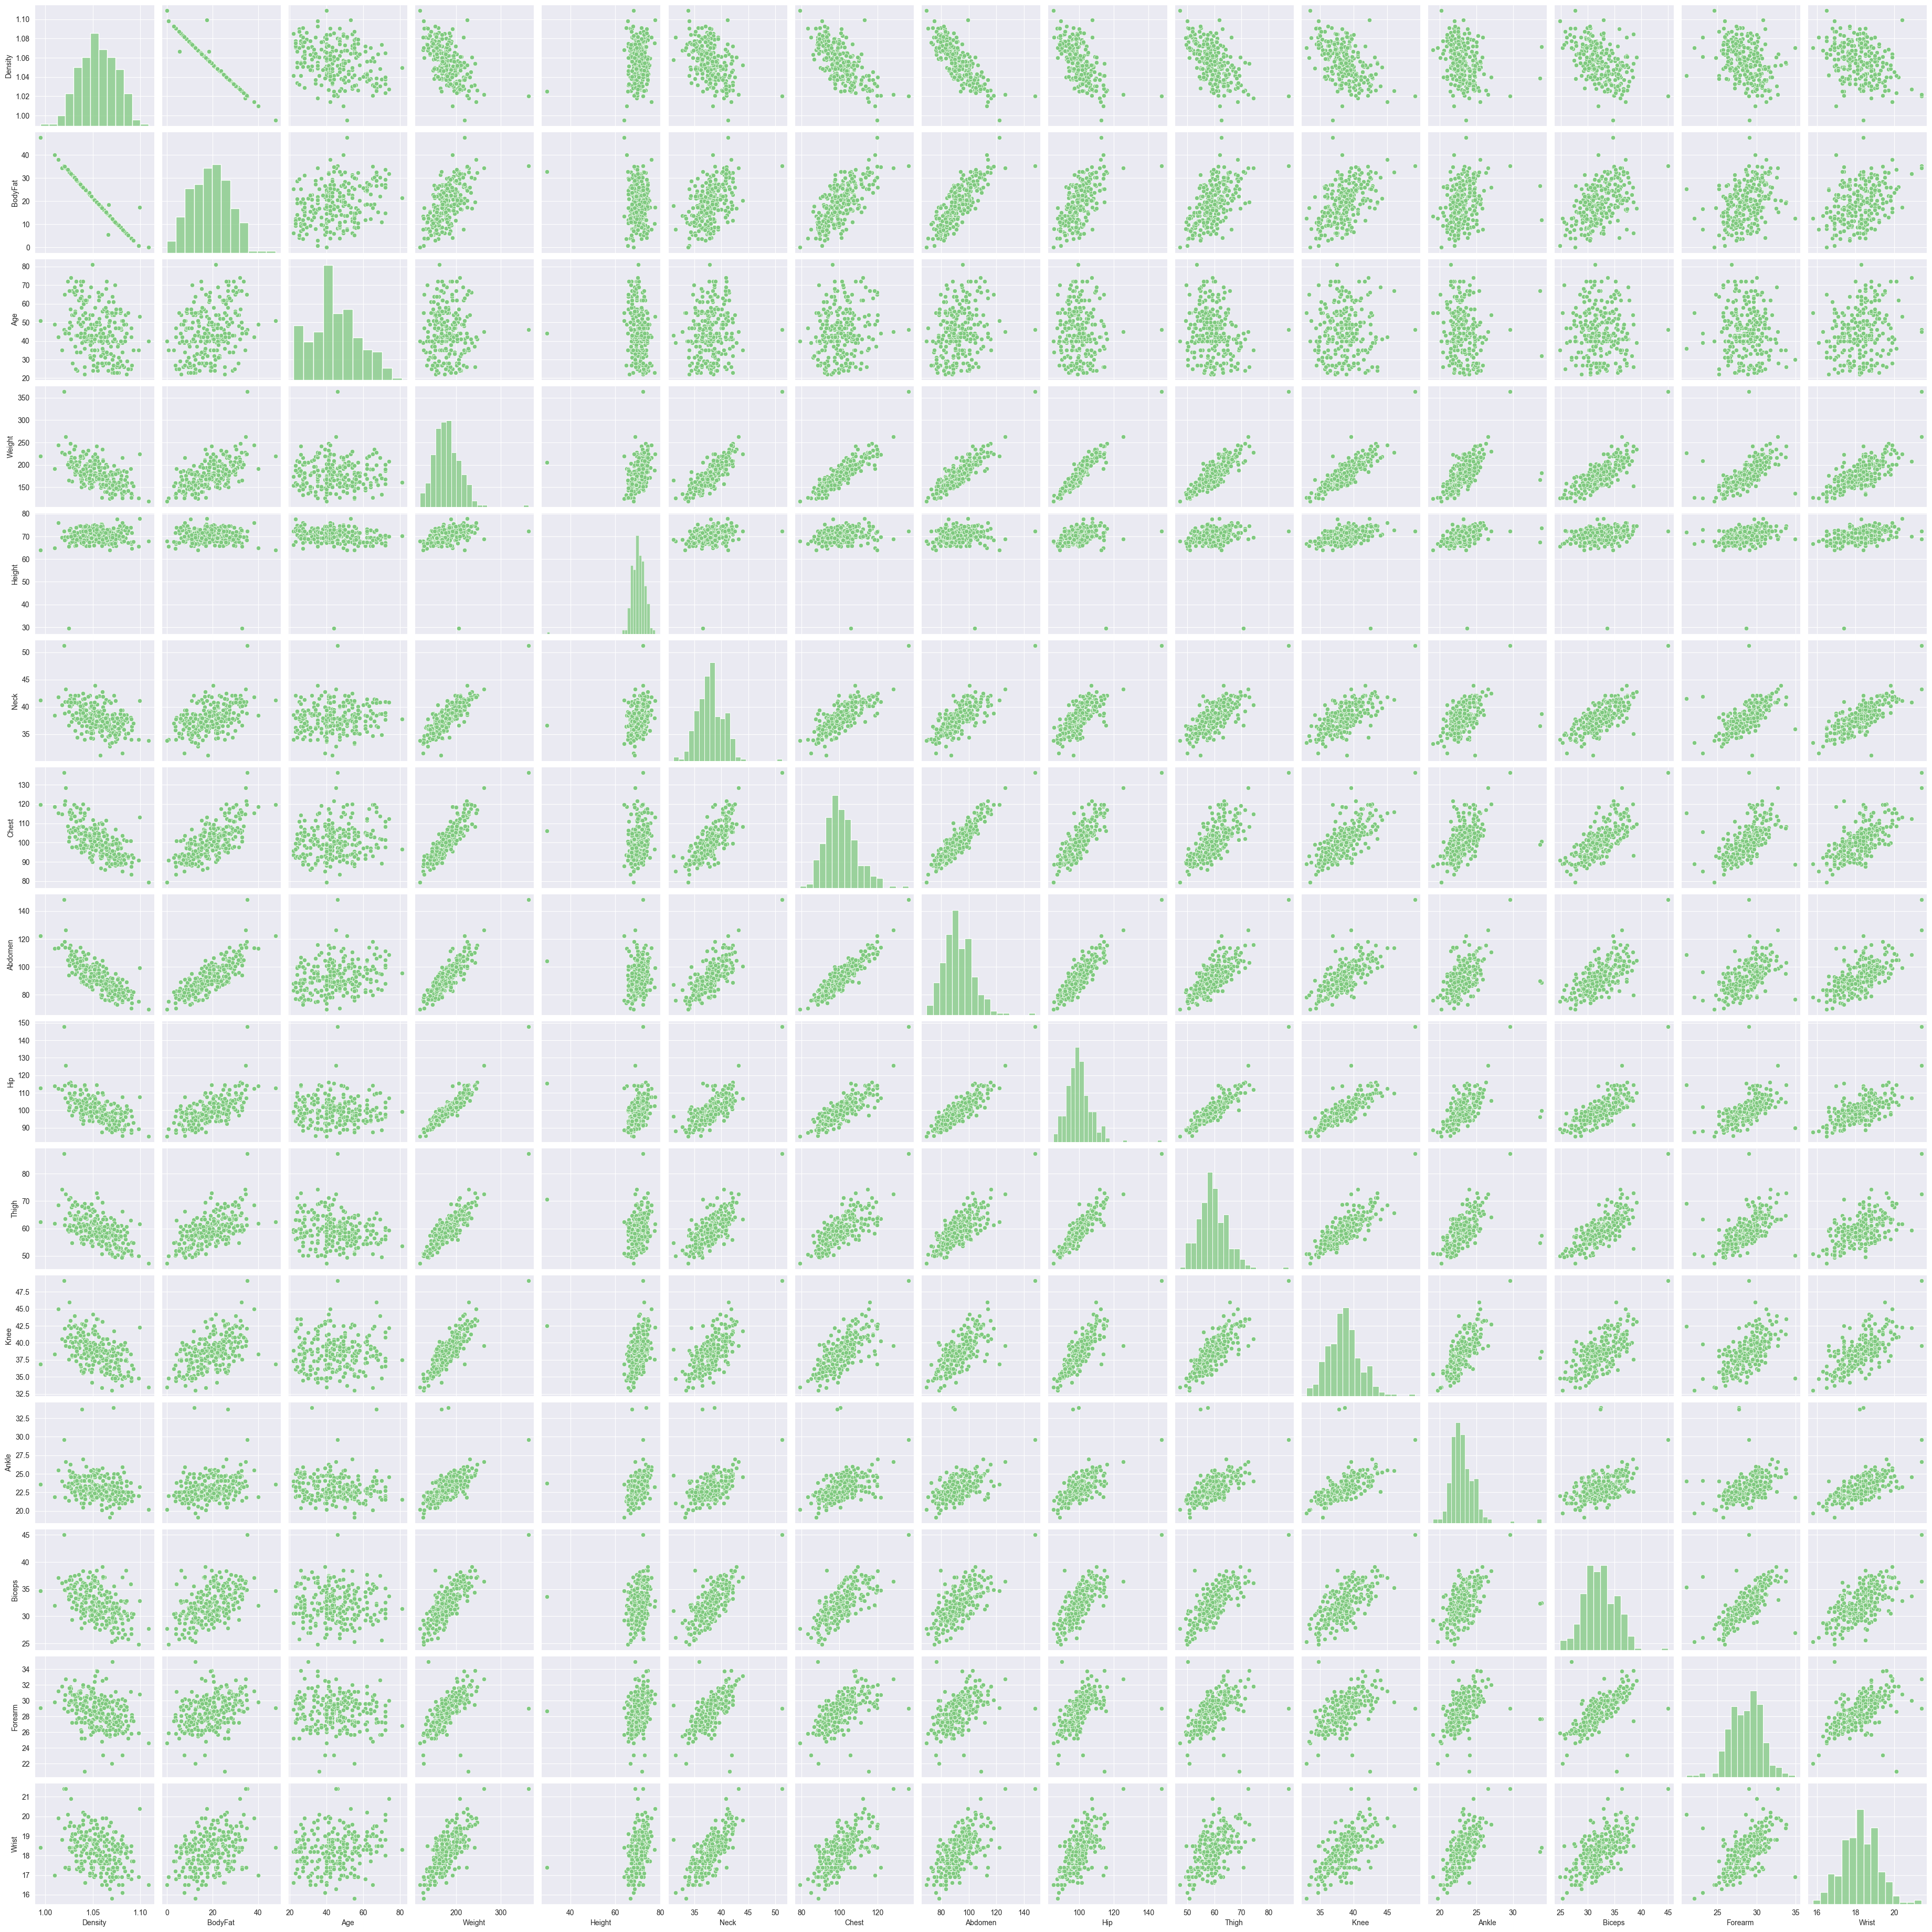

In [15]:
sns.pairplot(data)

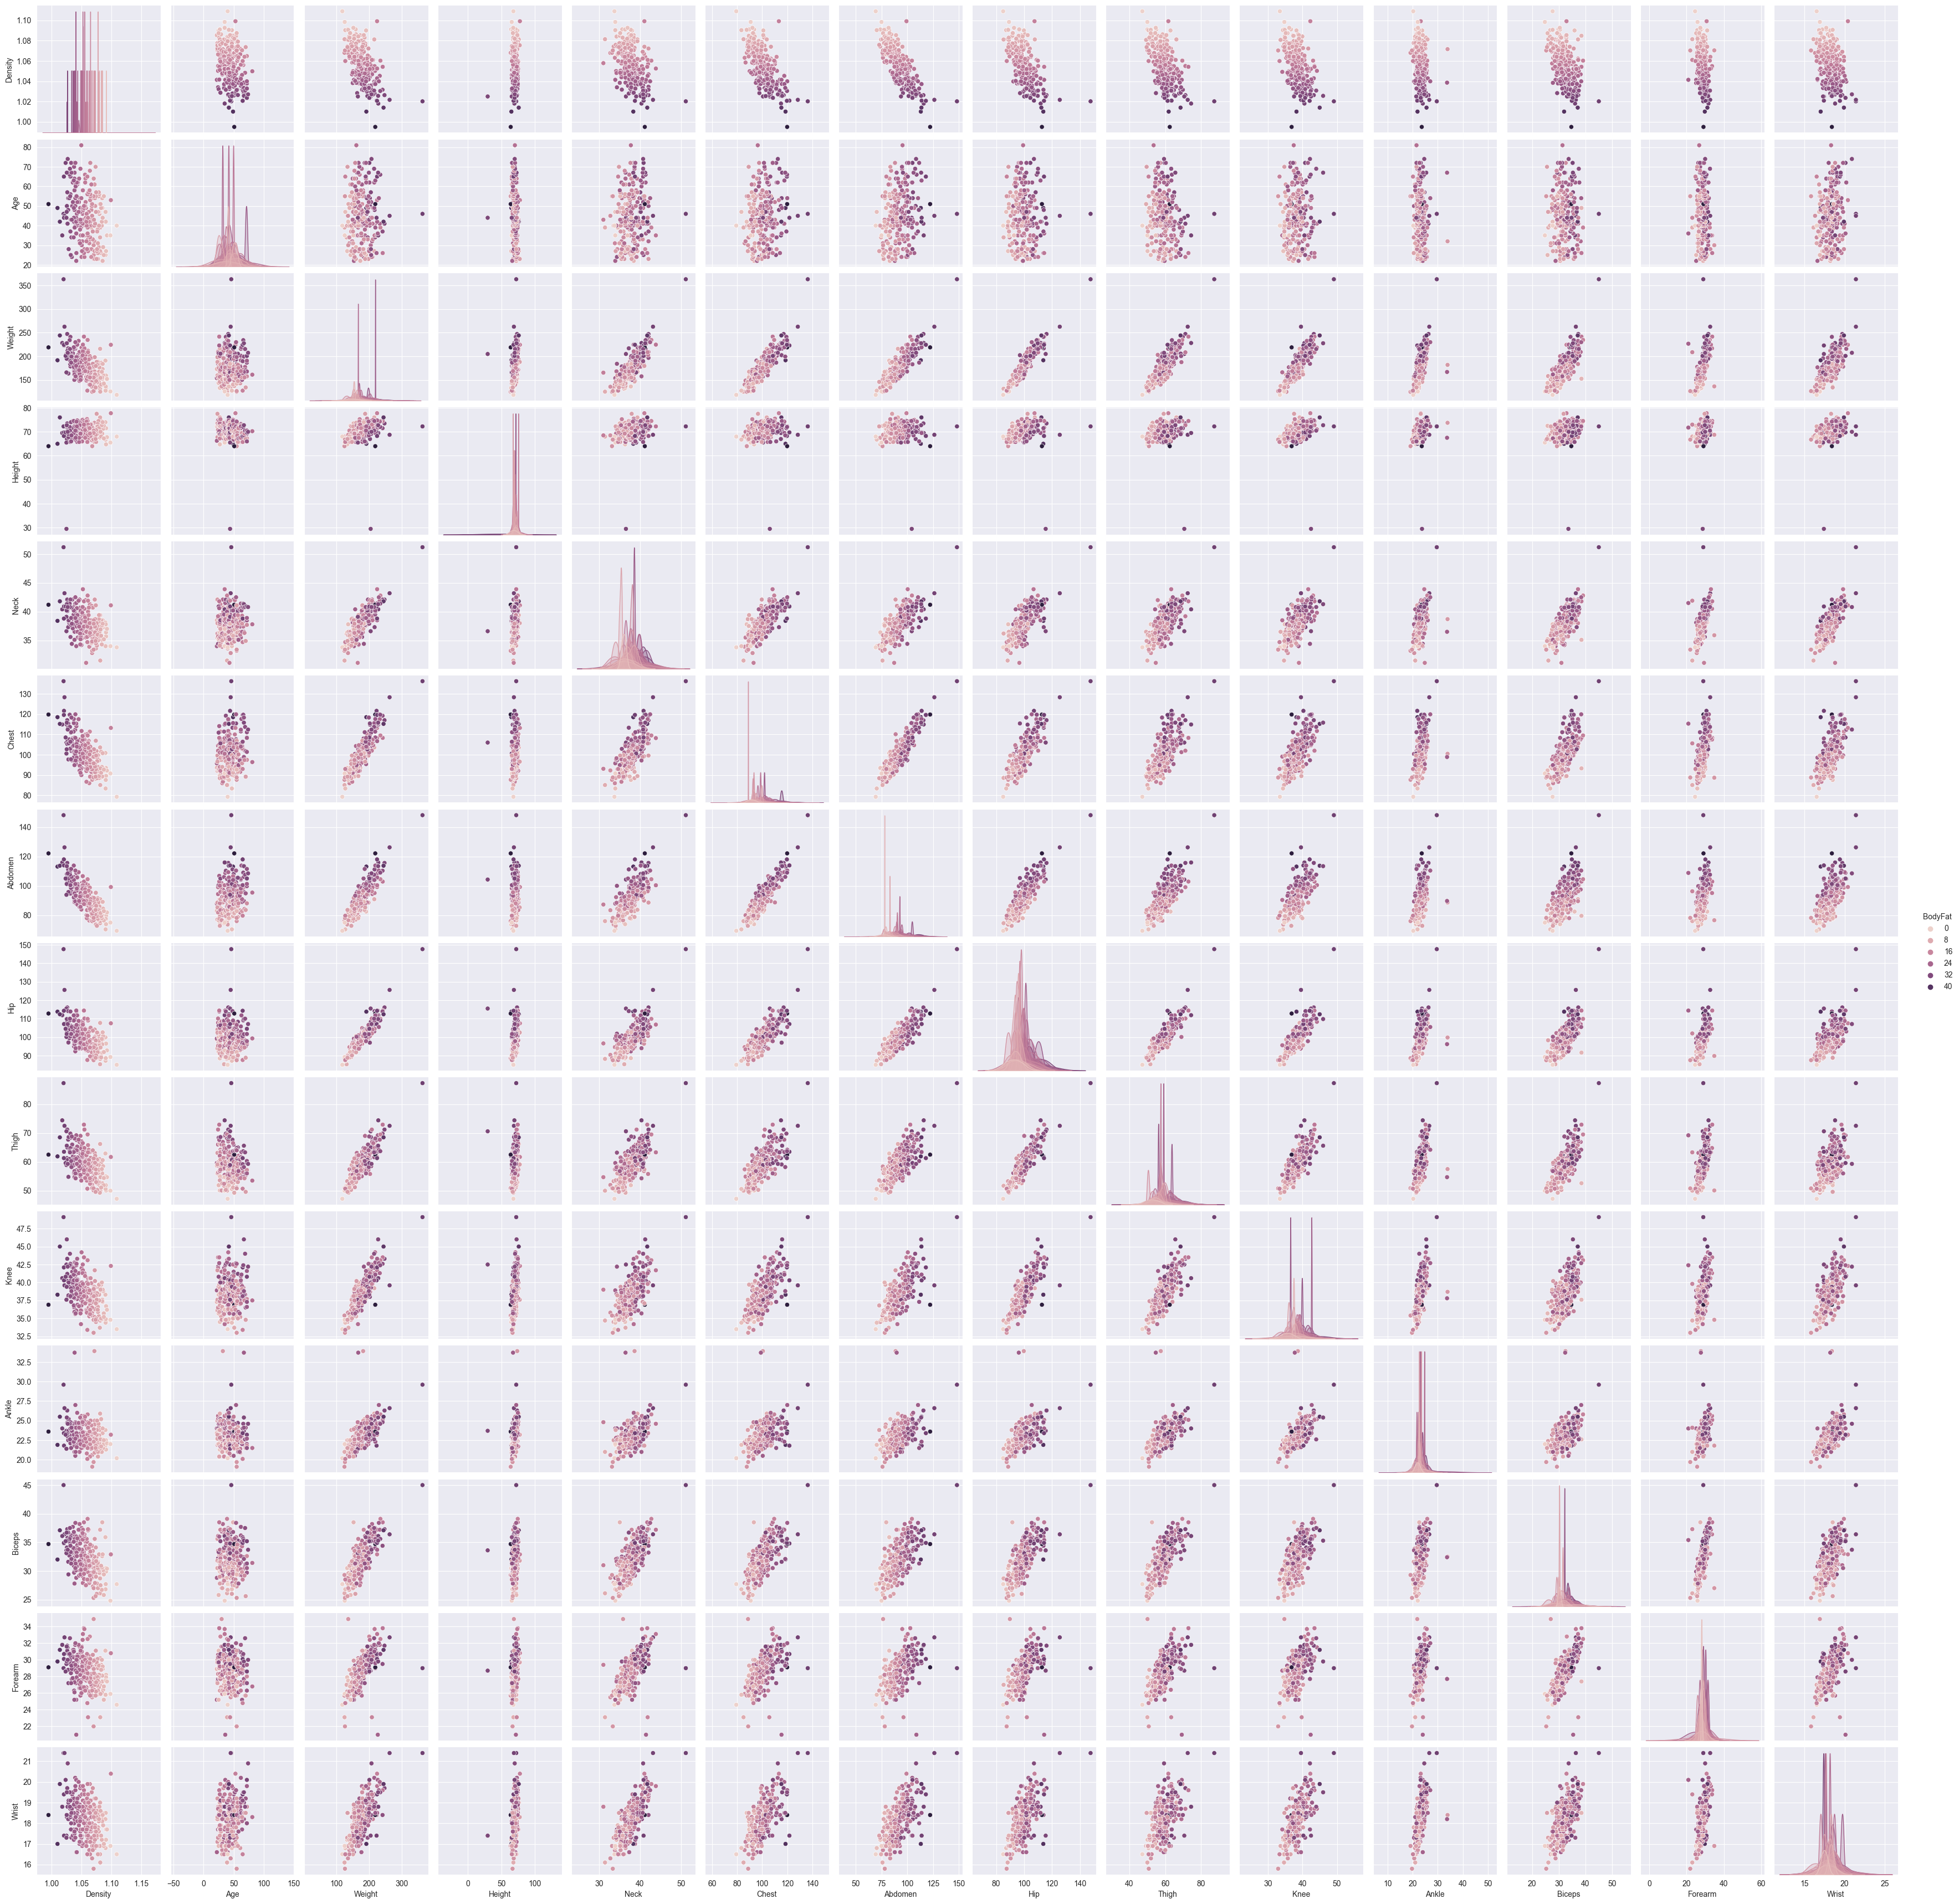

In [16]:
sns.pairplot(data, hue='BodyFat')

<Axes: >

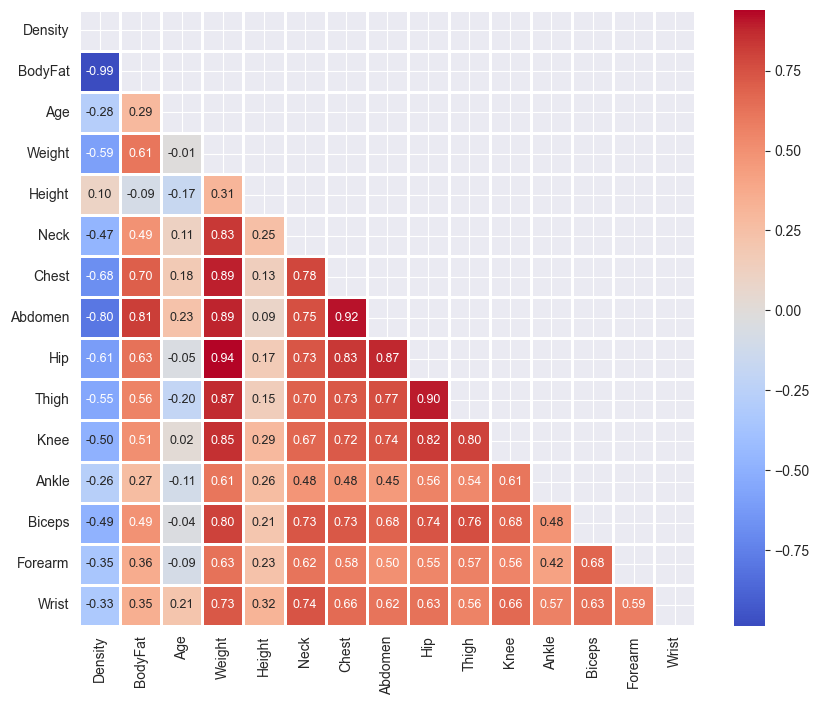

In [17]:
fig, ax = plt.subplots(figsize = (10,8))

corr_matrix = data.corr()

mask = np.triu(np.ones_like(corr_matrix))

sns.heatmap(
    data = corr_matrix,
    mask = mask,
    cmap = 'coolwarm',
    annot = True,
    annot_kws = {'size': 9},
    fmt = '.2f',
    square = True,
    linewidths = 1,
    ax = ax
)

In [14]:
sns.set_palette('Accent')
sns.set_style('darkgrid')

## Model Construction

In [20]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [55]:
ct = make_column_transformer(
    (MinMaxScaler(), numerical_features))

# Create X & y
X = data.drop(target, axis=1)
y = data[target]

# Trainign and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ct.fit(X_train)

# Data Transformation
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [56]:
X_train.loc[0]

Density      1.0708
Age         23.0000
Weight     154.2500
Height      67.7500
Neck        36.2000
Chest       93.1000
Abdomen     85.2000
Hip         94.5000
Thigh       59.0000
Knee        37.3000
Ankle       21.9000
Biceps      32.0000
Forearm     27.4000
Wrist       17.1000
Name: 0, dtype: float64

Model building

In [57]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [58]:
X_train.shape

(201, 14)

In [59]:
model = keras.Sequential([
    keras.layers.Dense(100),
    keras.layers.Dense(10),
    keras.layers.Dense(1)
])

In [60]:
model.compile(
    optimizer = 'adam',
    loss = keras.losses.mae,
    metrics = ['mae']
)

In [67]:
model.fit(X_train_normal, y_train, epochs=100, validation_data=(X_test_normal, y_test), verbose=1)

Epoch 1/100
7/7 [==============================] - 0s 29ms/step - loss: 2.1498 - mae: 2.1498 - val_loss: 2.1855 - val_mae: 2.1855
Epoch 2/100
7/7 [==============================] - 0s 3ms/step - loss: 2.1666 - mae: 2.1666 - val_loss: 1.8026 - val_mae: 1.8026
Epoch 3/100
7/7 [==============================] - 0s 3ms/step - loss: 2.0233 - mae: 2.0233 - val_loss: 1.8041 - val_mae: 1.8041
Epoch 4/100
7/7 [==============================] - 0s 3ms/step - loss: 1.9761 - mae: 1.9761 - val_loss: 1.8066 - val_mae: 1.8066
Epoch 5/100
7/7 [==============================] - 0s 3ms/step - loss: 2.0072 - mae: 2.0072 - val_loss: 1.8248 - val_mae: 1.8248
Epoch 6/100
7/7 [==============================] - 0s 3ms/step - loss: 1.9183 - mae: 1.9183 - val_loss: 1.7117 - val_mae: 1.7117
Epoch 7/100
7/7 [==============================] - 0s 4ms/step - loss: 1.9002 - mae: 1.9002 - val_loss: 1.7464 - val_mae: 1.7464
Epoch 8/100
7/7 [==============================] - 0s 4ms/step - loss: 1.9254 - mae: 1.9254 - va

In [68]:
model.evaluate(X_test_normal, y_test)

2/2 [==============================] - 0s 2ms/step - loss: 0.6884 - mae: 0.6884


[0.6884125471115112, 0.6884125471115112]

In [63]:
test_pred = model.predict(X_test_normal)
test_pred    

2/2 [==============================] - 0s 1ms/step


array([[18.272942 ],
       [16.172539 ],
       [28.834368 ],
       [17.689892 ],
       [15.126724 ],
       [12.076851 ],
       [18.086226 ],
       [19.568005 ],
       [ 8.808473 ],
       [10.771558 ],
       [26.294481 ],
       [24.781374 ],
       [16.036392 ],
       [18.011734 ],
       [ 7.6328783],
       [ 3.6471243],
       [17.869274 ],
       [19.691763 ],
       [20.036602 ],
       [ 9.510739 ],
       [16.832167 ],
       [20.121864 ],
       [13.174942 ],
       [14.417303 ],
       [21.980984 ],
       [30.662144 ],
       [25.585741 ],
       [15.730251 ],
       [ 6.803974 ],
       [12.483133 ],
       [22.435202 ],
       [12.531362 ],
       [20.018064 ],
       [21.590025 ],
       [18.754648 ],
       [ 4.07243  ],
       [20.188744 ],
       [15.502226 ],
       [15.589459 ],
       [12.187417 ],
       [14.664572 ],
       [24.948023 ],
       [26.742506 ],
       [ 5.4573016],
       [11.691889 ],
       [20.730808 ],
       [25.760288 ],
       [18.42

In [65]:
import tensorflow as tf

In [66]:
y_test.shape, test_pred.shape, tf.squeeze(test_pred).shape


((51,), (51, 1), TensorShape([51]))

In [ ]:
evaluate_preds(y_test,test_pred)